In [11]:
import pandas as pd
import ast
from scipy.spatial import distance
import seaborn as sns
from bamt.networks.continuous_bn import ContinuousBN
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [12]:
data = pd.read_csv('results/paper_cec/4 20 0.05 0.9 high exp2.csv')
data

,Number of atr,P_edge,Target assort,Target correlation,Calculated_corr,Time,Deviation_assort
0,5,0.05,0.2,"[0.21911231101419557, 0.04202877113399168, 0.2...","[0.15375096069168862, 0.07673337994641573, 0.1...",124,0.0
1,5,0.05,0.2,"[0.21911231101419557, 0.04202877113399168, 0.2...","[0.003177148404719695, -0.07137254647130907, 0...",124,0.1
2,5,0.05,0.9,"[0.21911231101419557, 0.04202877113399168, 0.2...","[0.028122510269655013, -0.08201932720001502, -...",118,0.0
3,5,0.05,0.9,"[0.21911231101419557, 0.04202877113399168, 0.2...","[0.14920765625808072, -0.1679856926803123, 0.0...",118,0.1
4,5,0.05,0.2,"[0.896243648387824, 0.8764743386867624, 0.7829...","[-0.07723609331775982, 0.8795085713977949, 0.3...",131,0.0
...,...,...,...,...,...,...,...
233,20,0.05,0.2,"[0.8372096644442305, 0.8029281125603025, 0.872...","[0.7776175818091849, 0.41912496651265707, 0.47...",519,0.2
234,20,0.05,0.2,"[0.8372096644442305, 0.8029281125603025, 0.872...","[0.66666646088526, 0.09960763916777621, 0.4212...",519,0.3
235,20,0.05,0.2,"[0.8372096644442305, 0.8029281125603025, 0.872...","[0.7320524824178574, -0.12440312913191616, 0.2...",519,0.5
236,20,0.05,0.9,"[0.8372096644442305, 0.8029281125603025, 0.872...","[0.9685611444643006, 0.5020192045215788, -0.30...",166,0.1


In [13]:
for i in data.index:
    origin_corr = ast.literal_eval(data.loc[i,'Target correlation'])
    calculated_corr = ast.literal_eval(data.loc[i,'Calculated_corr'])
    data.loc[i, 'Corr distance'] = distance.euclidean(origin_corr, calculated_corr)
    

In [19]:
for i in data.index:
    origin_corr = ast.literal_eval(data.loc[i,'Target correlation'])
    if origin_corr[0] < 0.5:
        data.loc[i, 'Corr type'] = 'low'
    else:
        data.loc[i, 'Corr type'] = 'high'
    

<AxesSubplot: xlabel='Number of atr', ylabel='Corr distance'>

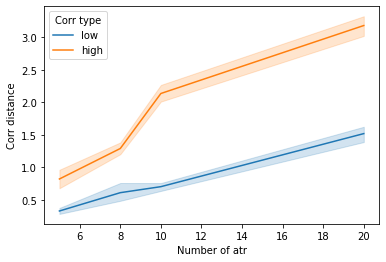

In [20]:
sns.lineplot(x='Number of atr', y='Corr distance', hue='Corr type', data=data)

<AxesSubplot: xlabel='Number of atr', ylabel='Deviation_assort'>

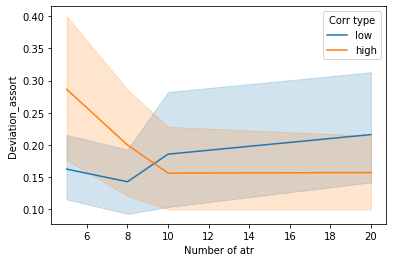

In [21]:
sns.lineplot(x='Number of atr', y='Deviation_assort', hue='Corr type', data=data)

In [36]:
bn = ContinuousBN()
bn.load('results/paper_cec/0 8 0.05 0.9 low 0 exp2.json.json')

True

In [37]:
sample = bn.sample(1000)

100%|██████████| 1000/1000 [00:00<00:00, 2593.65it/s]


<AxesSubplot: >

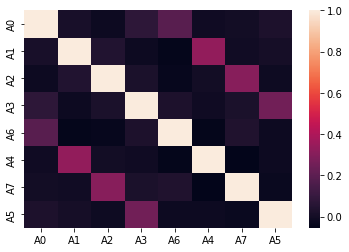

In [38]:
sns.heatmap(sample.corr())